# Supercooled liquids

We will study the dynamics of a glass-forming Lennard-Jones binary mixture composed of $N=1200$ particles under periodic boundary conditions. The interaction model is due to Kob and Andersen and is meant to mimic some of the physical properties of the binary metallic alloy $Ni_{80} P_{20}$.

We will analyze trajectories obtained from molecular dynamics simulations performed in the microcanonical ensemble, at a density $\rho=1.2$ and two different temperatures: $T=1.0$ (normal liquid) and $T=0.4$ (supercooled liquid). As usual, energies and lengths are measured in units of $\epsilon$ and $\sigma$, respectively.

The simulations at low temperature were performed using a highly efficient GPU code developed at the Roskilde University (https://rumd.org). The data have been analyzed in [D. Coslovich, M. Ozawa, W. Kob, Eur. Phys. J. E, 41, 62 (2018)](https://doi.org/10.1140/epje/i2018-11671-2) 

We download the trajectory files (in compressed xyz format) and store them in the current directory. They are bigger than the ones we used to study the structure, so be patient

In [1]:
import zipfile
from atooms.core.utils import download

# We download and unpack the trajectories
# These commands will create two directories named T1.00 and T0.40 in the current directory
for url in ['https://cloud.coulomb.umontpellier.fr/index.php/s/a7iCbnoCWBkaioR/download',
            'https://cloud.coulomb.umontpellier.fr/index.php/s/zZBafFkWQsZAFBz/download']:
    download(url, '.')
    with zipfile.ZipFile('download', 'r') as zh:
        zh.extractall('.')

HTTPError: HTTP Error 404: Not Found

Let us compute the self part of the intermediate scattering functions $F_s(k=7.0,t)$ at the two temperatures. The wave vector is chosen to match approximately the first peak of the structure factor $S(k)$. It may take a couple of minutes.

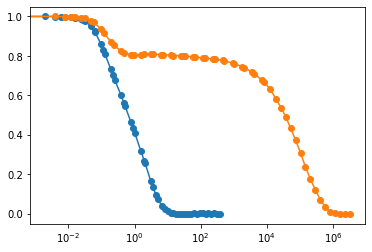

In [6]:
from matplotlib import pyplot as plt
from atooms.trajectory import SuperTrajectoryRUMD
import atooms.postprocessing as pp

with SuperTrajectoryRUMD('T1.00') as th:
    cf = pp.SelfIntermediateScattering(th, kgrid=[7.0])
    cf.compute()
    plt.semilogx(cf.grid[1], cf.value[0], '-o')

with SuperTrajectoryRUMD('T0.40') as th:
    cf = pp.SelfIntermediateScattering(th, kgrid=[7.0])
    cf.compute()
    plt.semilogx(cf.grid[1], cf.value[0], '-o')

**Exercise 1**: *relaxation times*

1) Look up the structural relaxation times $\tau_\alpha$, defined by the condition $F_s(\tau_\alpha, k)=1/e$ and compare their values at $T=1.0$ and $T=0.4$. (*Hint*: given a `SelfIntermediateScattering` object `cf`, the values of the relaxation times are stored in theh dictionary `cf.relaxation_times`).

2) Compare $\tau_\alpha$ at $T=0.4$ to the observation time $\tau_{obs}$. Can we consider the liquid to be in metastable equilibrium? (*Hint*: you can find the total duraction of a trajectory `th` with `th.total_time`). 

**Exercise 2**: *stretching exponents*

1) Fit the decay of the self intermediate scattering function to the following stretched exponential form
$$
F_s(k,t) = A \exp{[-(t/\tau_\alpha)^\beta]}
$$
and extract the stretching exponent $\beta$. Compare the values at high and low temperature.

*Hint 1*: at low temperature, fit only the decay from the plateau in the correlation function.

*Hint 2*: you can constrain the fit by using the value of $\tau_\alpha$ obtained in the first exercice. 

2) Give a physical interpretation to the parameter $A$. How do you think it will change if you further decrease the temperature?

**Exercise 3**: *Gaussian approximation*

Compute the mean square displacement and test the Gaussian approximation
$$
F_s(k,t) = \exp{\left(-\frac{1}{6} k^2 t\right)}
$$
at high and low temperature by superposing the actual self intermediate scattering function to its approximation at the wave-vector $k=7.0$. Provide a physical interpretation of these results.

**Exercice 4**: *pair structure*

Compute the structure factor $S(k)$ and / or the radial distribution function $g(r)$. (Notice that in principle one should consider the partial correlations between particles of species 1 and 2.). Do you observe any qualitative change in their shape when decreasing the temperature? Would you describe the change in pair structure to be strong, mild or neigligible? (compare with Exercise 1)